In [1]:
% cd /home/mayu-ot/Documents/iparaphrasing-master/

/home/mayu-ot/Documents/iparaphrasing-master


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve

In [4]:
# validation set
split = 'val'
p_type = 'avr'
res1 = pd.read_csv('models/%s-None/res_%s.csv'%(p_type, split))
res2 = pd.read_csv('models/%s-vgg/res_%s.csv'%(p_type, split))

p_score = res1.score.values
i_score = res2.score.values

ens_score = (p_score + i_score) * .5

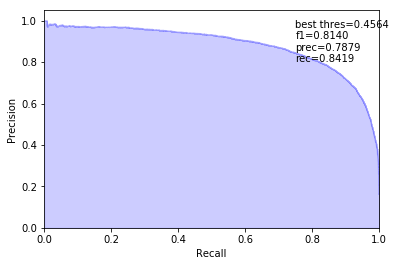

In [5]:
y_true = res1.ytrue
precision, recall, thres = precision_recall_curve(y_true=y_true, probas_pred=ens_score)

plt.clf()
plt.step(recall, precision, color='b', alpha=0.2,
     where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

f1 = 2. * (precision * recall) / (precision + recall)
f1[np.isnan(f1)] = 0.
best_idx = f1.argmax()
best_prec, best_rec, best_thres = precision[best_idx], recall[best_idx], thres[best_idx]

summary = 'best thres=%.4f\nf1=%.4f\nprec=%.4f\nrec=%.4f'%(best_thres, f1[best_idx], best_prec, best_rec)
plt.text(.75, .8, summary)

In [6]:
ens_res = res1.copy()
ens_res.score = ens_score
ens_res.ypred = ens_score > best_thres

In [7]:
# test set
split = 'test'
res1 = pd.read_csv('models/%s-None/res_%s.csv'%(p_type, split))
res2 = pd.read_csv('models/%s-vgg/res_%s.csv'%(p_type, split))

p_score = res1.score.values
i_score = res2.score.values

ens_score = (p_score + i_score) * .5

y_true = res1.ytrue
y_pred = ens_score

best_prec = precision_score(y_true, y_pred > best_thres)
best_rec = recall_score(y_true, y_pred > best_thres)
f1 = f1_score(y_true, y_pred > best_thres)

summary = 'predefined thres=%.4f\nf1=%.2f\nprec=%.2f\nrec=%.2f'%(best_thres, 100*f1, 100*best_prec, 100*best_rec)
print(summary)

predefined thres=0.4564
f1=82.67
prec=80.65
rec=84.79
